In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt

In [2]:
def ruta_instancia(instancia):
    return 'instancias/%s.txt' % instancia

# Creo el archivo que con los puntos de la $instancia y los parámetros del algoritmo
def crear_instancia(instancia, algoritmo, profundidad, sigmaT, ft, podas_a_aplicar):
    file_name = 'instancias/corridas/%s_%s_%s_%s_%s_%s.txt' % (instancia, algoritmo, profundidad, sigmaT, ft, podas_a_aplicar)
    output_file = open(file_name, 'w')
    output_file.write(algoritmo + '\n')

    output_file.write(str(profundidad) + '\n')
    output_file.write(str(sigmaT) + '\n')
    output_file.write(str(ft) + '\n')
    output_file.write(str(podas_a_aplicar) + '\n')

    #output_file.write(str(poda) + '\n')
        
    archivo_instancia = open(ruta_instancia(instancia), 'r')
    output_file.writelines(archivo_instancia.readlines())
    archivo_instancia.close()
    
    output_file.close()
    return file_name

In [3]:
# Creo un DataFrame con la instancia pedida
def cargar_informacion(nombre_instancia):
    matrix_data = []
    archivo_instancia = open(ruta_instancia(nombre_instancia), 'rb')
    size = int(archivo_instancia.readline())
    
    indice = 1
    lineas = archivo_instancia.readlines()
    for linea in lineas:
        lista = linea.split()
        x = int(lista[0])
        y = int(lista[1])
        matrix_data.append([indice,x,y, nombre_instancia])
        indice = indice + 1
    archivo_instancia.close()
    
    return pd.DataFrame(matrix_data, columns=['numero_punto','x', 'y','instancia'])

In [4]:
# Corro el $algoritmo (ejecutable) para el input del $archivo
def correr_instancia(archivo, algoritmo):
    archivo = open(archivo, 'rb')
    input_data = archivo.read()
    archivo.close()
    result = subprocess.run(["../../bin/%s" % algoritmo], stdout=subprocess.PIPE, input=input_data)
    clusters = result.stdout.decode("utf-8").split('\n')
    clusters.pop(len(clusters) -1)
    return lista_de(clusters,int)

def lista_de(lista,tipo):
    return list(map(lambda valor : tipo(valor),lista))

In [5]:
# Englobo todas las funciones y devuelvo un DataFrame con la instancia y los clusters calculados
def calcular_y_graficar(instancia, algoritmo, profundidad, sigmaT, ft, podas_a_aplicar = 'ambas'):
    file_name = crear_instancia(instancia,algoritmo,profundidad,sigmaT,ft,podas_a_aplicar)
    data_frame = cargar_informacion(instancia)
    data_frame['clusters'] = correr_instancia(file_name, 'ejercicio-1-main')
    return data_frame

# Pruebas de Jupyter y gráficos

### Correr una instancia con parámetros

In [26]:
instancia = 'ejemplo-10'
file_name = crear_instancia(instancia,'kruskal-compressed',3,2,2,'ambas')
data_frame = cargar_informacion(instancia)
data_frame

,numero_punto,x,y,instancia
0,1,1,3,ejemplo-10
1,2,2,3,ejemplo-10
2,3,1,1,ejemplo-10
3,4,2,1,ejemplo-10
4,5,2,2,ejemplo-10
5,6,8,3,ejemplo-10
6,7,9,3,ejemplo-10
7,8,8,4,ejemplo-10
8,9,8,5,ejemplo-10
9,10,9,5,ejemplo-10


In [28]:
print(file_name)
print(correr_instancia(file_name, 'ejercicio-1-main'))
data_frame['clusters'] = correr_instancia(file_name, 'ejercicio-1-main')
data_frame

instancias/corridas/ejemplo-10_kruskal-compressed_3_2_2_ambas.txt
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


,numero_punto,x,y,instancia,clusters
0,1,1,3,ejemplo-10,1
1,2,2,3,ejemplo-10,1
2,3,1,1,ejemplo-10,1
3,4,2,1,ejemplo-10,1
4,5,2,2,ejemplo-10,1
5,6,8,3,ejemplo-10,2
6,7,9,3,ejemplo-10,2
7,8,8,4,ejemplo-10,2
8,9,8,5,ejemplo-10,2
9,10,9,5,ejemplo-10,2


### Graficar la instancia anterior

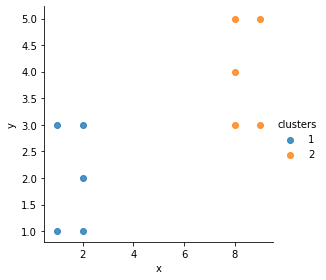

In [29]:
sns.lmplot(data=data_frame,x='x',y='y',hue='clusters',fit_reg=False, legend=True, legend_out=True,height=4)

In [30]:
df = calcular_y_graficar('ejemplo-10' ,'kruskal',3,1.5,1.5)

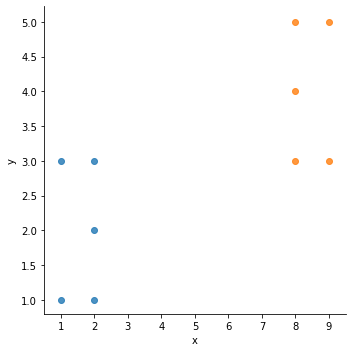

In [31]:
sns.lmplot(data=df ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=5)

### Graficar otra instancia

In [32]:
df = calcular_y_graficar('ejemplo-10' ,'prim',3,1.5,1.5)

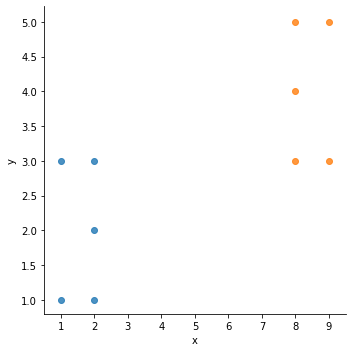

In [33]:
sns.lmplot(data=df ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=5)

# Testing del código desde python con los graficadores

OBS: Ya está todo testeado desde c++ pero queremos probar desde acá para chequear los resultados de manera visual.

In [34]:
df1 = calcular_y_graficar('instancia-1' ,'kruskal-compressed',2,2,1.5)

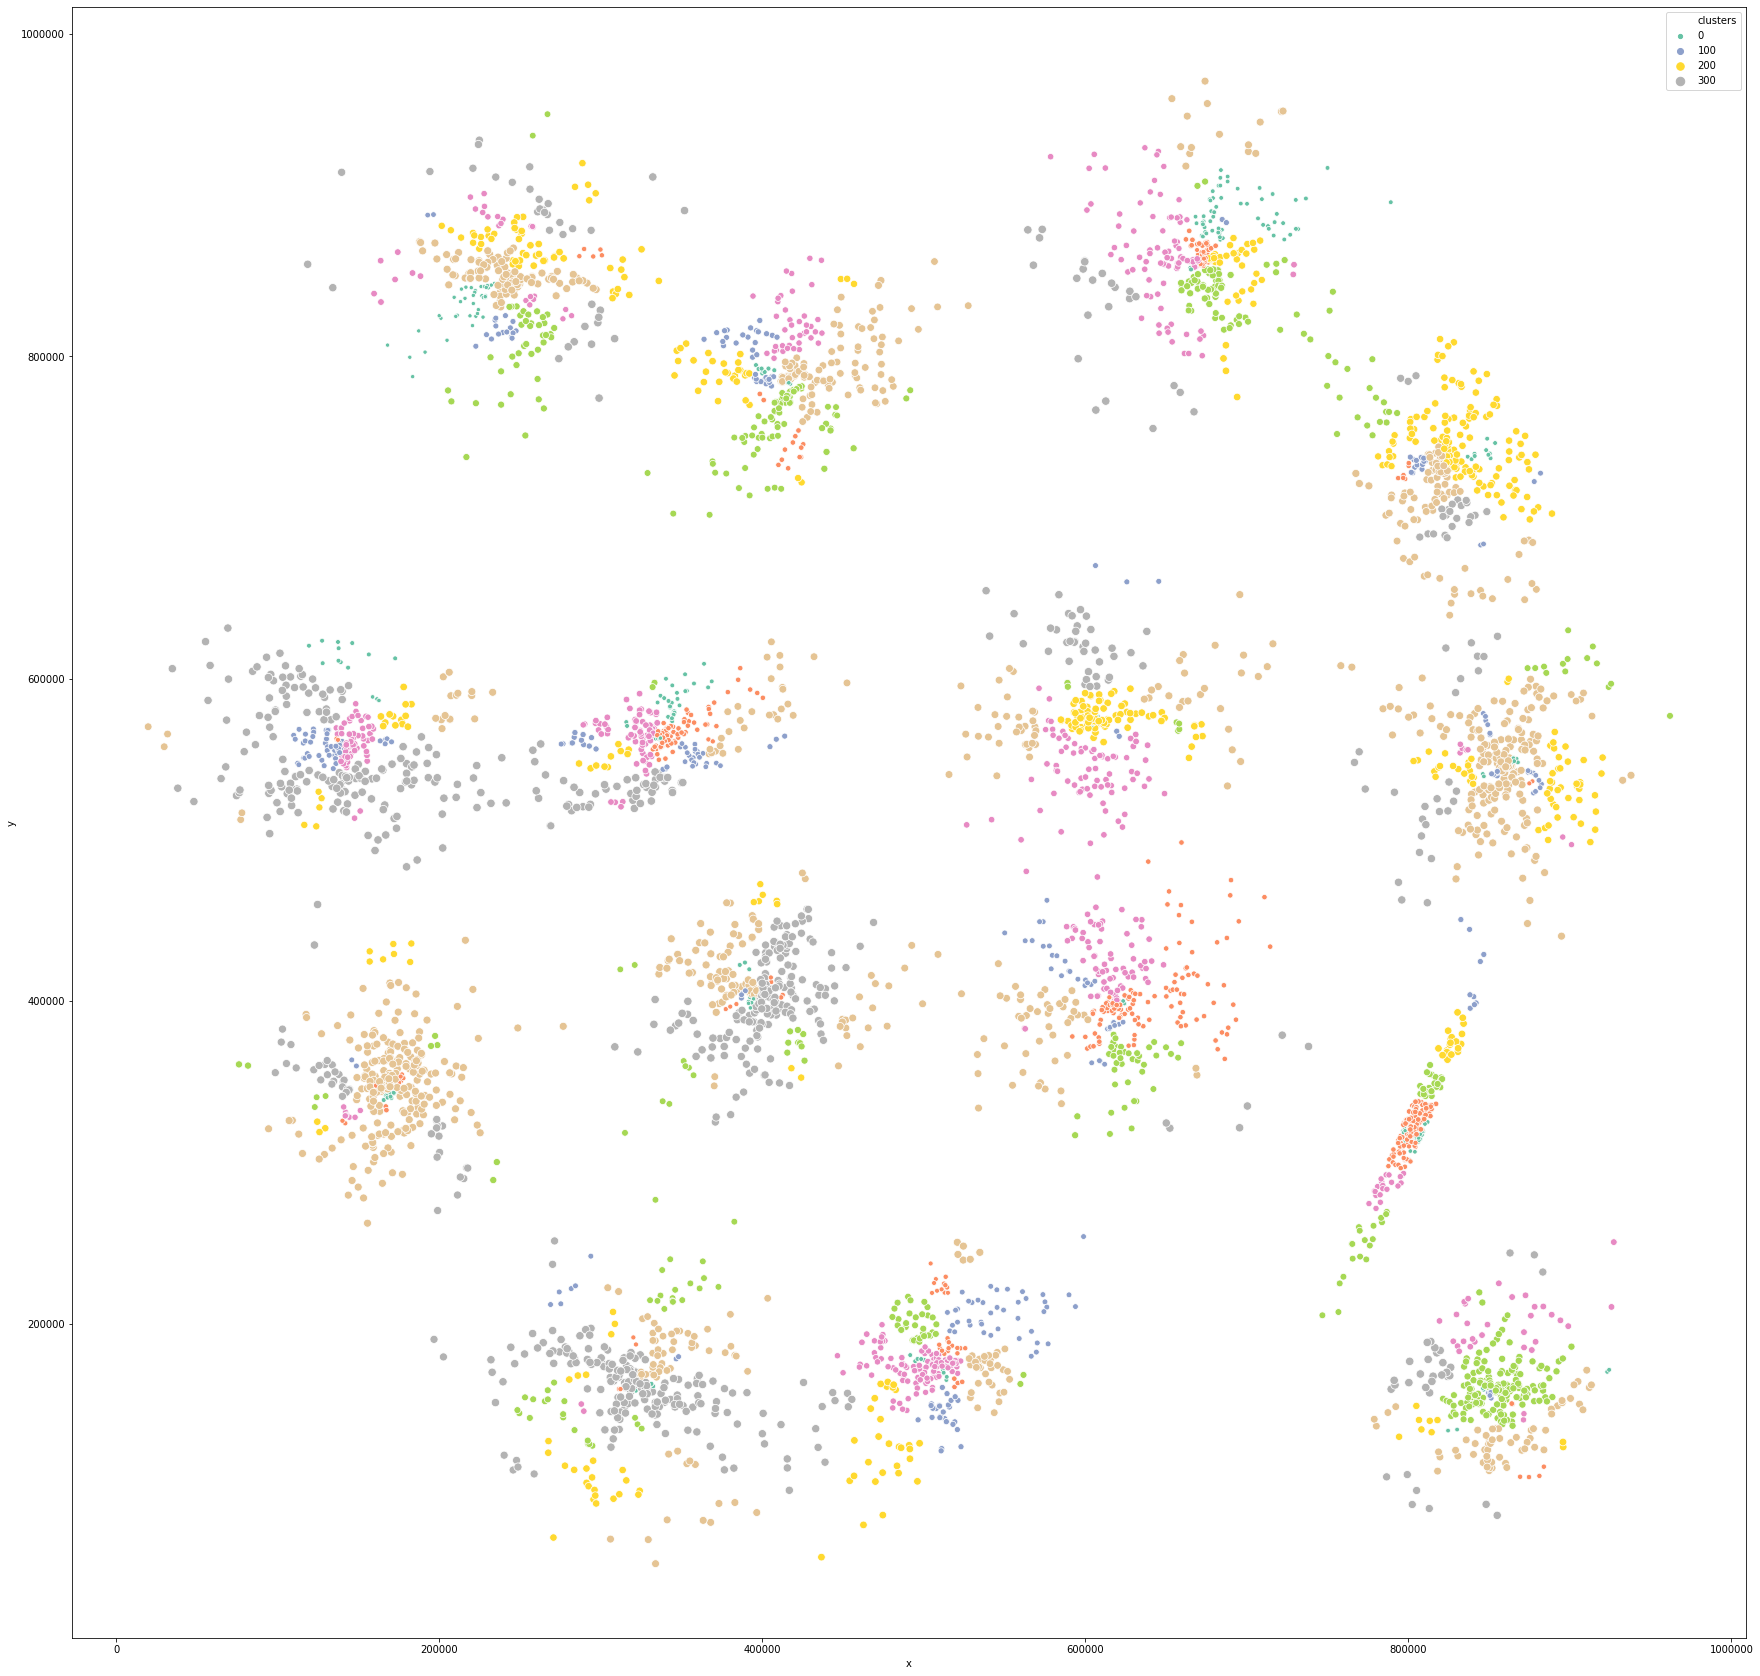

In [35]:
plt.figure(figsize=(30, 30))
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x='x',y='y',hue='clusters', size='clusters' ,data=df1, palette='Set2')

Parametros recomendados por el paper. Los encontramos insatisfactorios para el experimento porque hay una gran disparidad en los clusters.

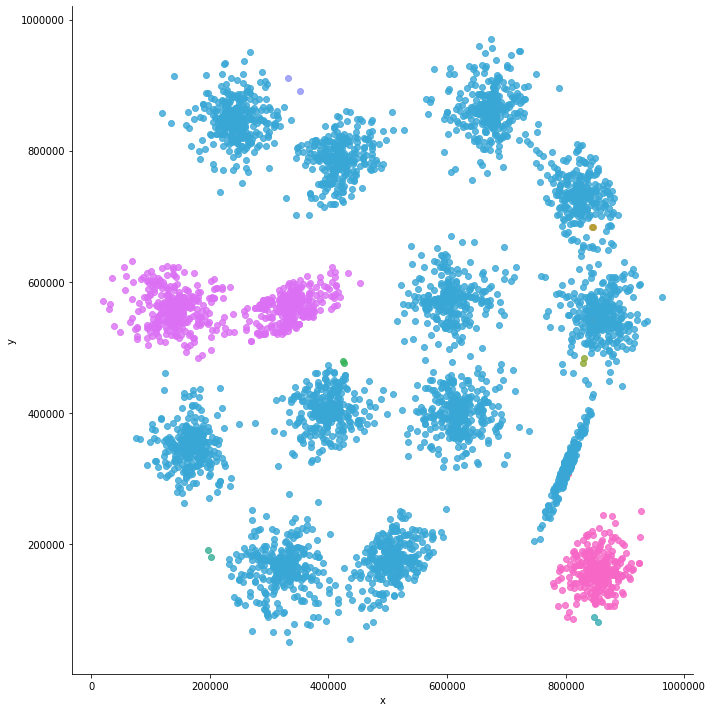

In [38]:
df2 = calcular_y_graficar('instancia-1' ,'kruskal-compressed',10,5,5)
sns.lmplot(data=df2 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=10)

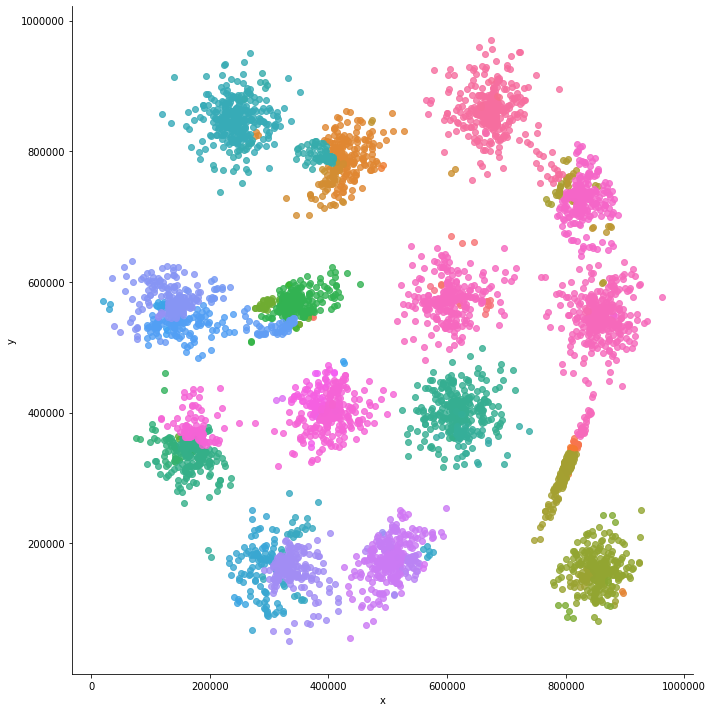

In [8]:
df3 = calcular_y_graficar('instancia-1' ,'prim',5,2,1.3)
sns.lmplot(data=df3 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=10)

# Experimentación para el trabajo (Ahora si)

De http://cs.joensuu.fi/sipu/datasets/ bajamos las instancias de dos dimensiones de los clusters DIM-2, unbalance, s-sets y a-sets

Como tenemos tres parámetros para pasarle a nuestro algoritmo queremos probarlos a los tres lo 'más aislados posible' y luego juntos para poder sacar conclusiones por separado y luego hipótesis para todos juntos. Estos parámetros son la profundidad, sigmaT y ft. 

## Empezamos experimentando el parámetro de profundidad.

El primero es input de la función de segmentación por lo que vamos a probar con valores fijos para sigmaT y ft para empezar.

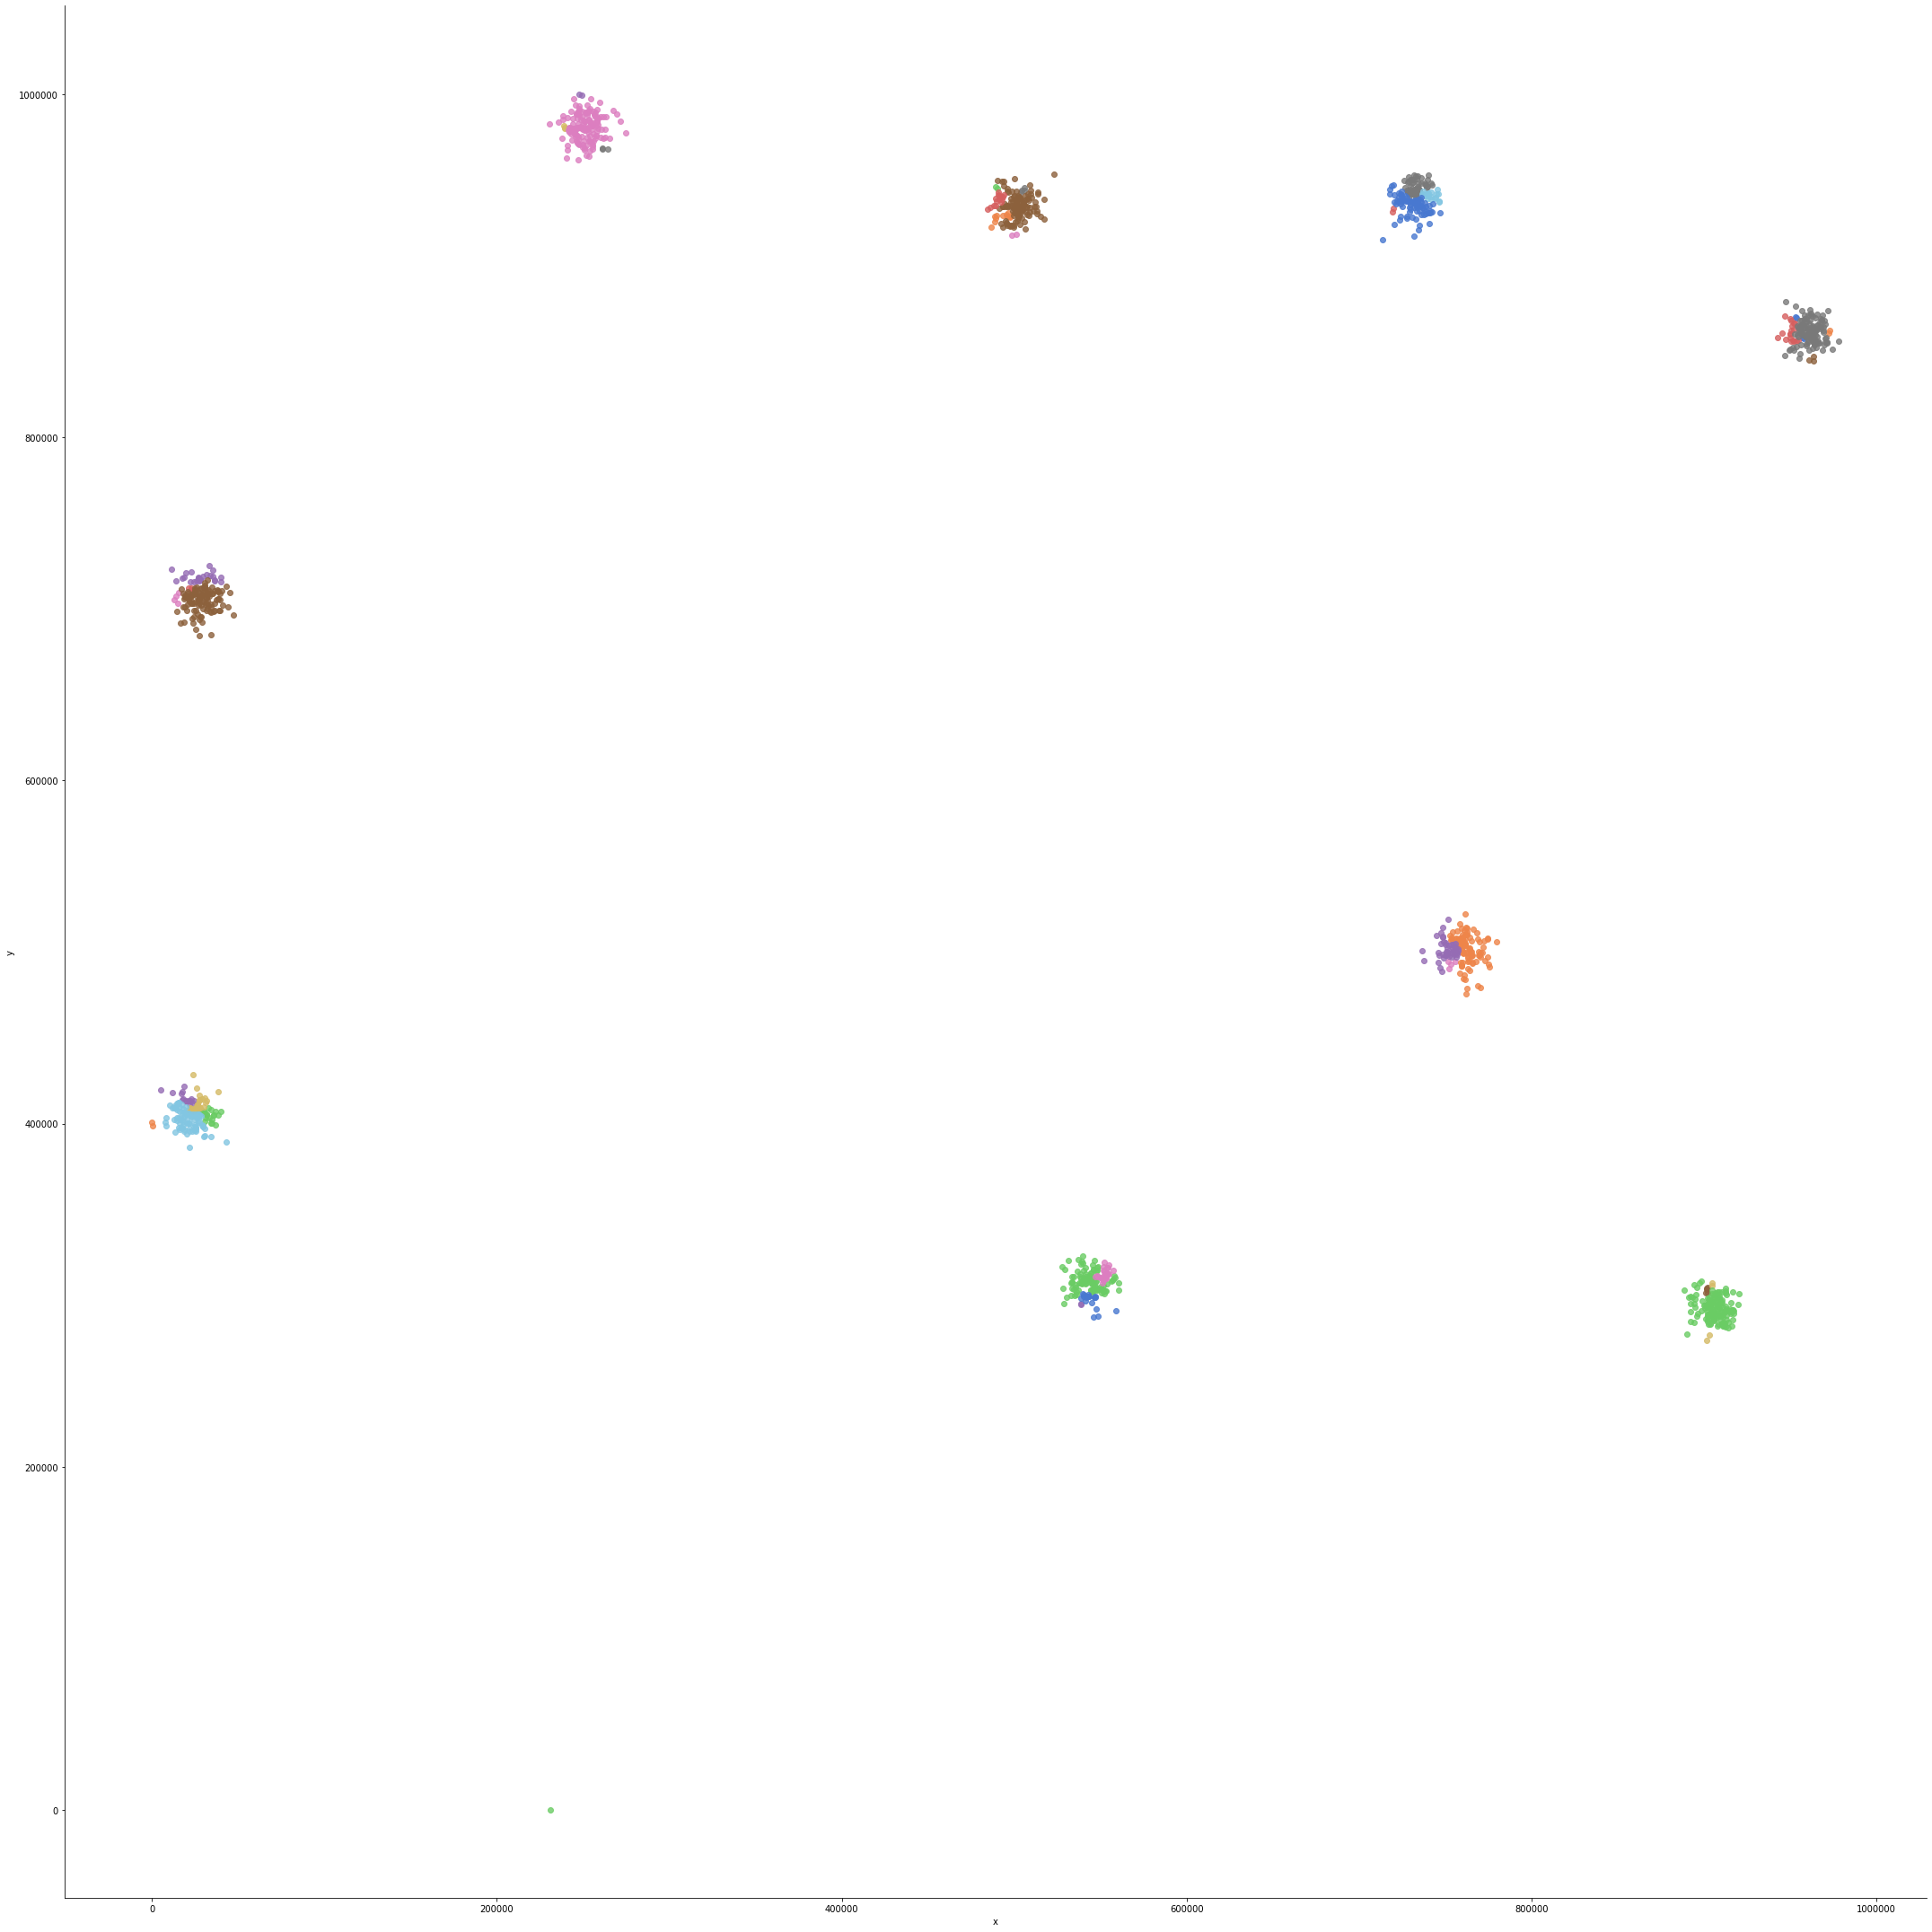

In [40]:
df10 = calcular_y_graficar('DIM-2','kruskal-compressed',5,1.5,1.5)
sns.lmplot(data=df10 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=30,palette=sns.color_palette("muted"))

Acá lo que observamos es que en la medida que aumentamos el vecidario de puntos (con la profundidad), si analizamos un outlier con peso W al arbol, la media comienza a "bajar" entonces es más facil satisfacer la condición de inconsitencia: W / meadia > ft.
Para los puntos que no son outliers eso hace que tengan más información de su vecindario por lo que es más complicado que estén en distintos clusters.


Por esto es que suponemos que al reducir el vecindario con una profundidad más chica, vamos a tener mas clusters.
Esto lo decimos porque al tener menos información del entorno de cada punto, podemos encontrar diferentes clusters solamente por el hecho de cómo es que se formó el mst. Nuestra conclusión es que es más recomendable tener un entorno más grande para así no perder información valiosa.

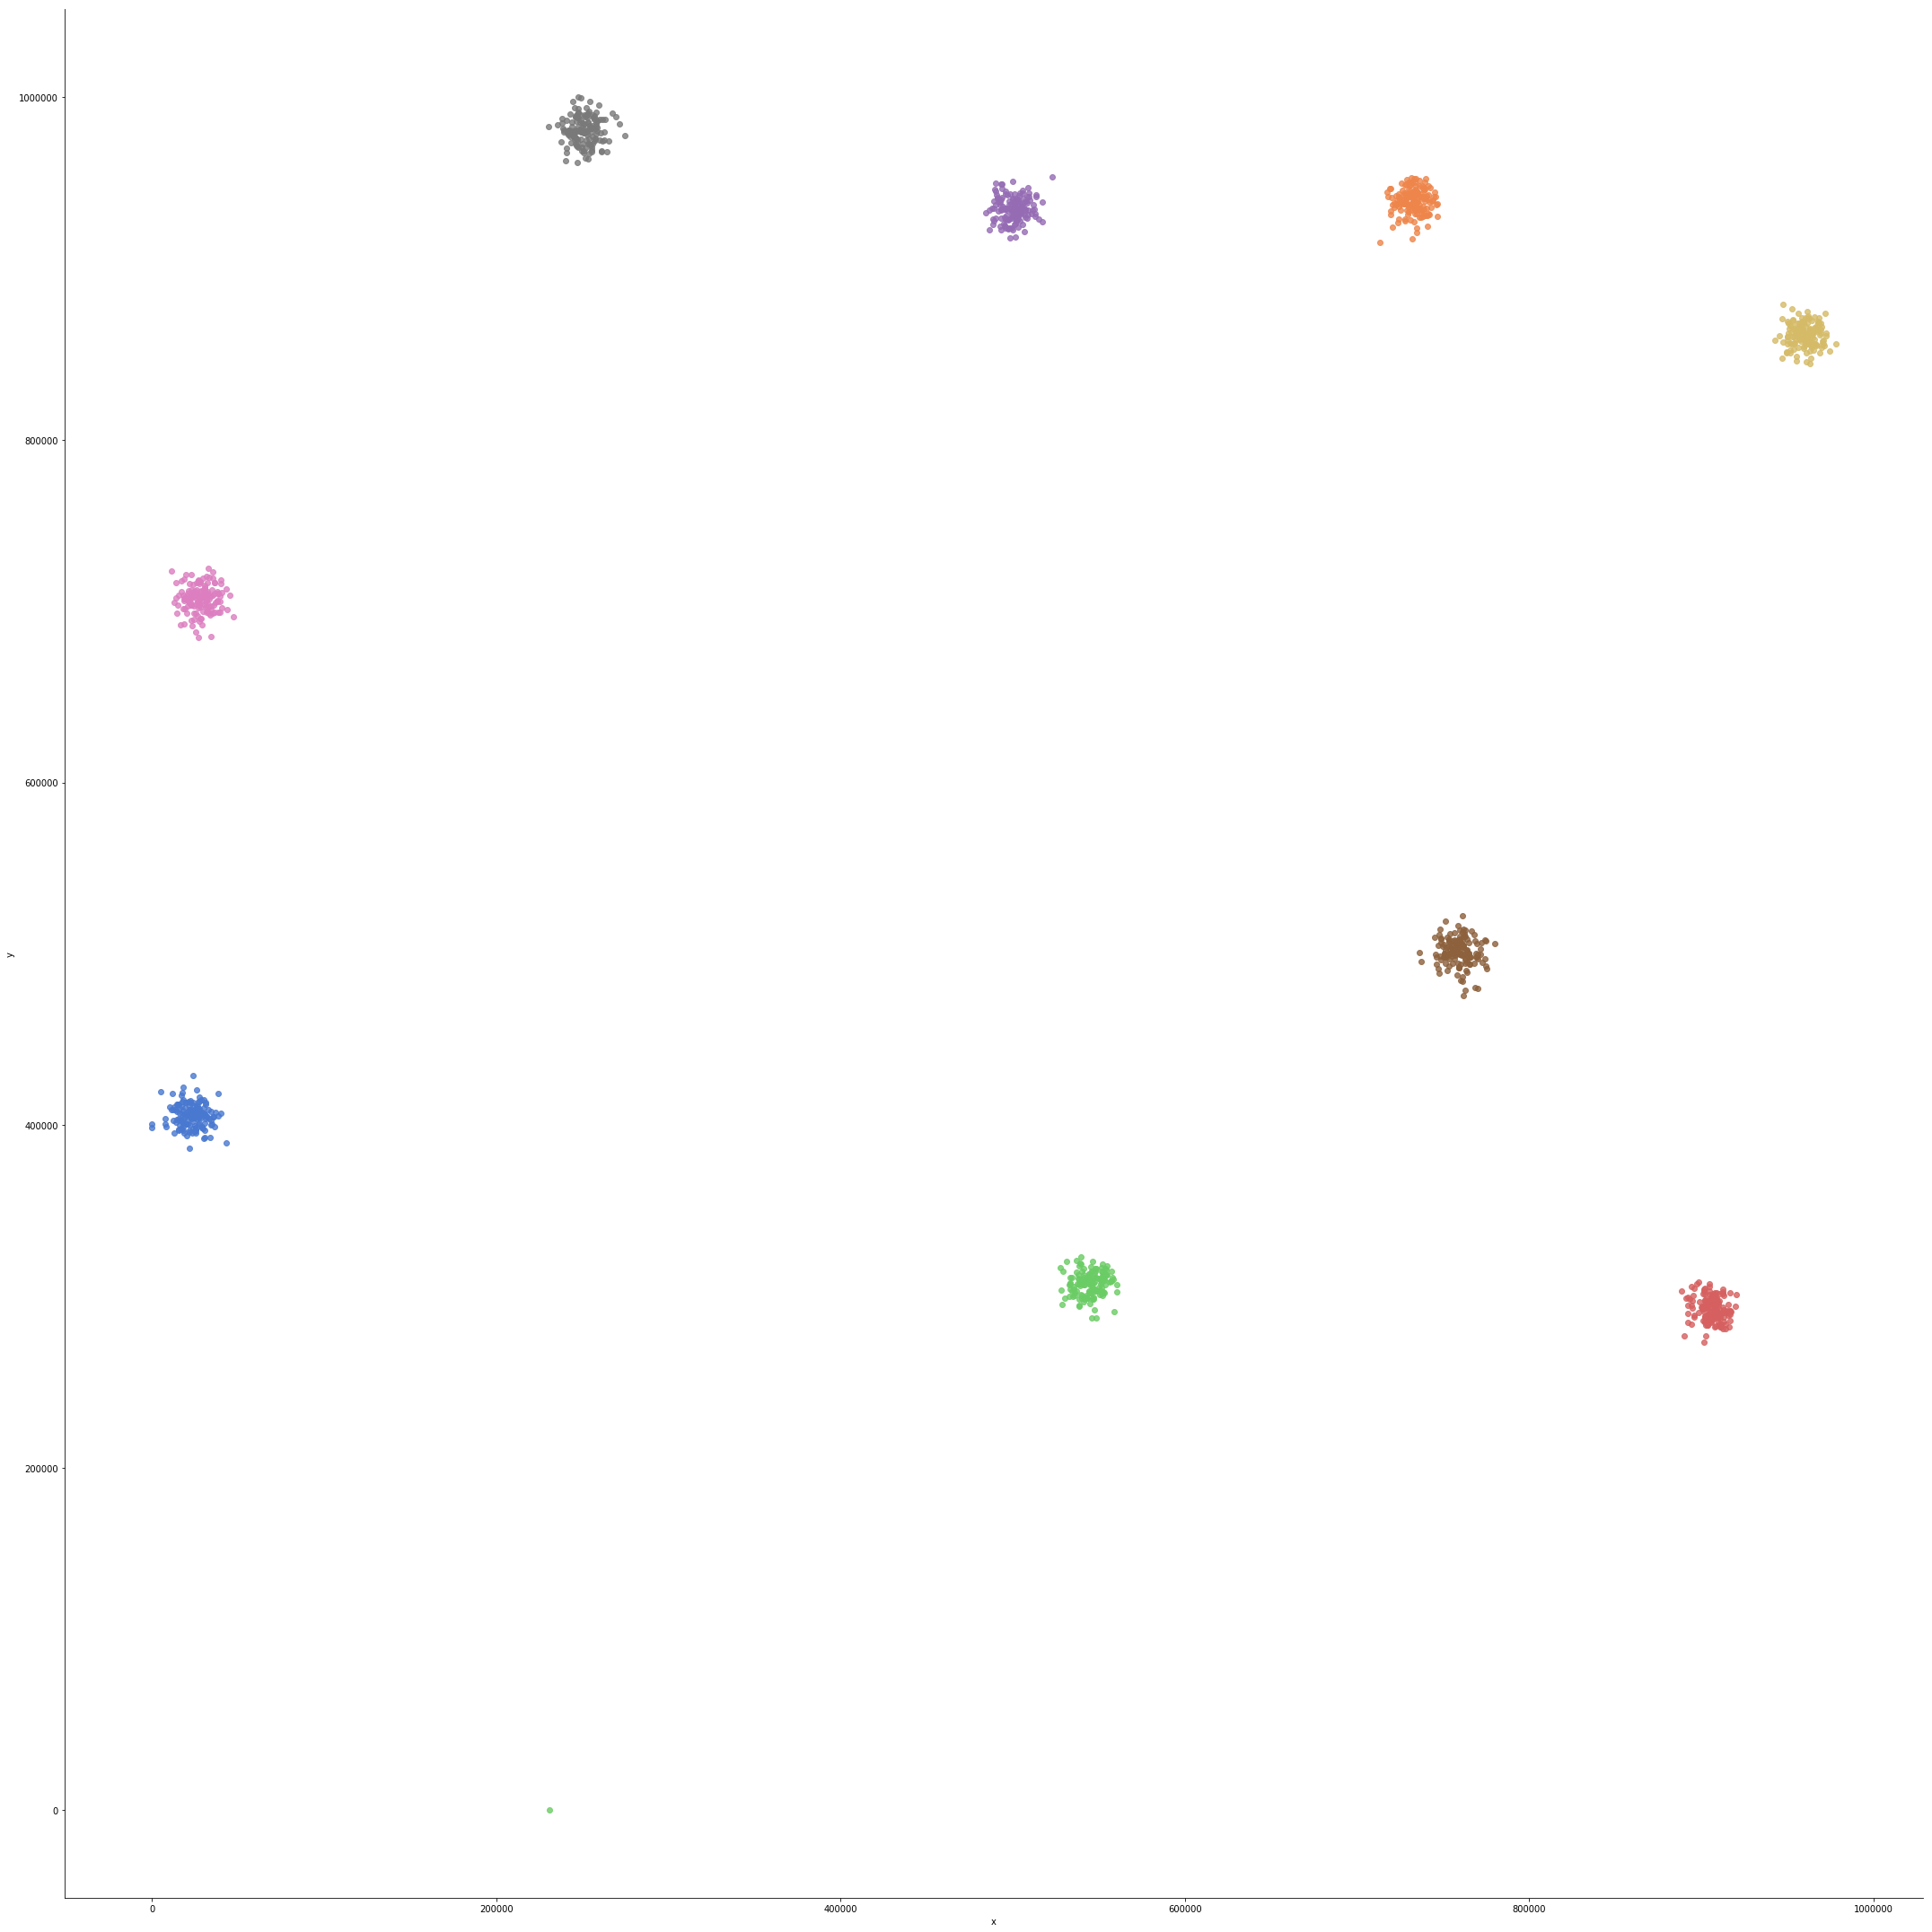

In [22]:
df10 = calcular_y_graficar('DIM-2','kruskal-compressed',profundidad=2,sigmaT=0,ft=4.5)
sns.lmplot(data=df10 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=30,palette=sns.color_palette("muted"))

Vimos que se cumplio lo que esperabamos que pasara. Esto se puede ver especialmente en los cluster de abajo de la imagen.

## Ahora queremos ver que pasa cuando modificamos el ft con d fijo.

Para esto solo usaremos la poda de ft.

Esperamos ver que al reducir el valor de ft vamos a segmentar cada vez más en diferentes clusters porque la condición se vuelva más debil y más facil de cumplir. Esperamos ver peores segmentaciones con cada reducción de ft.

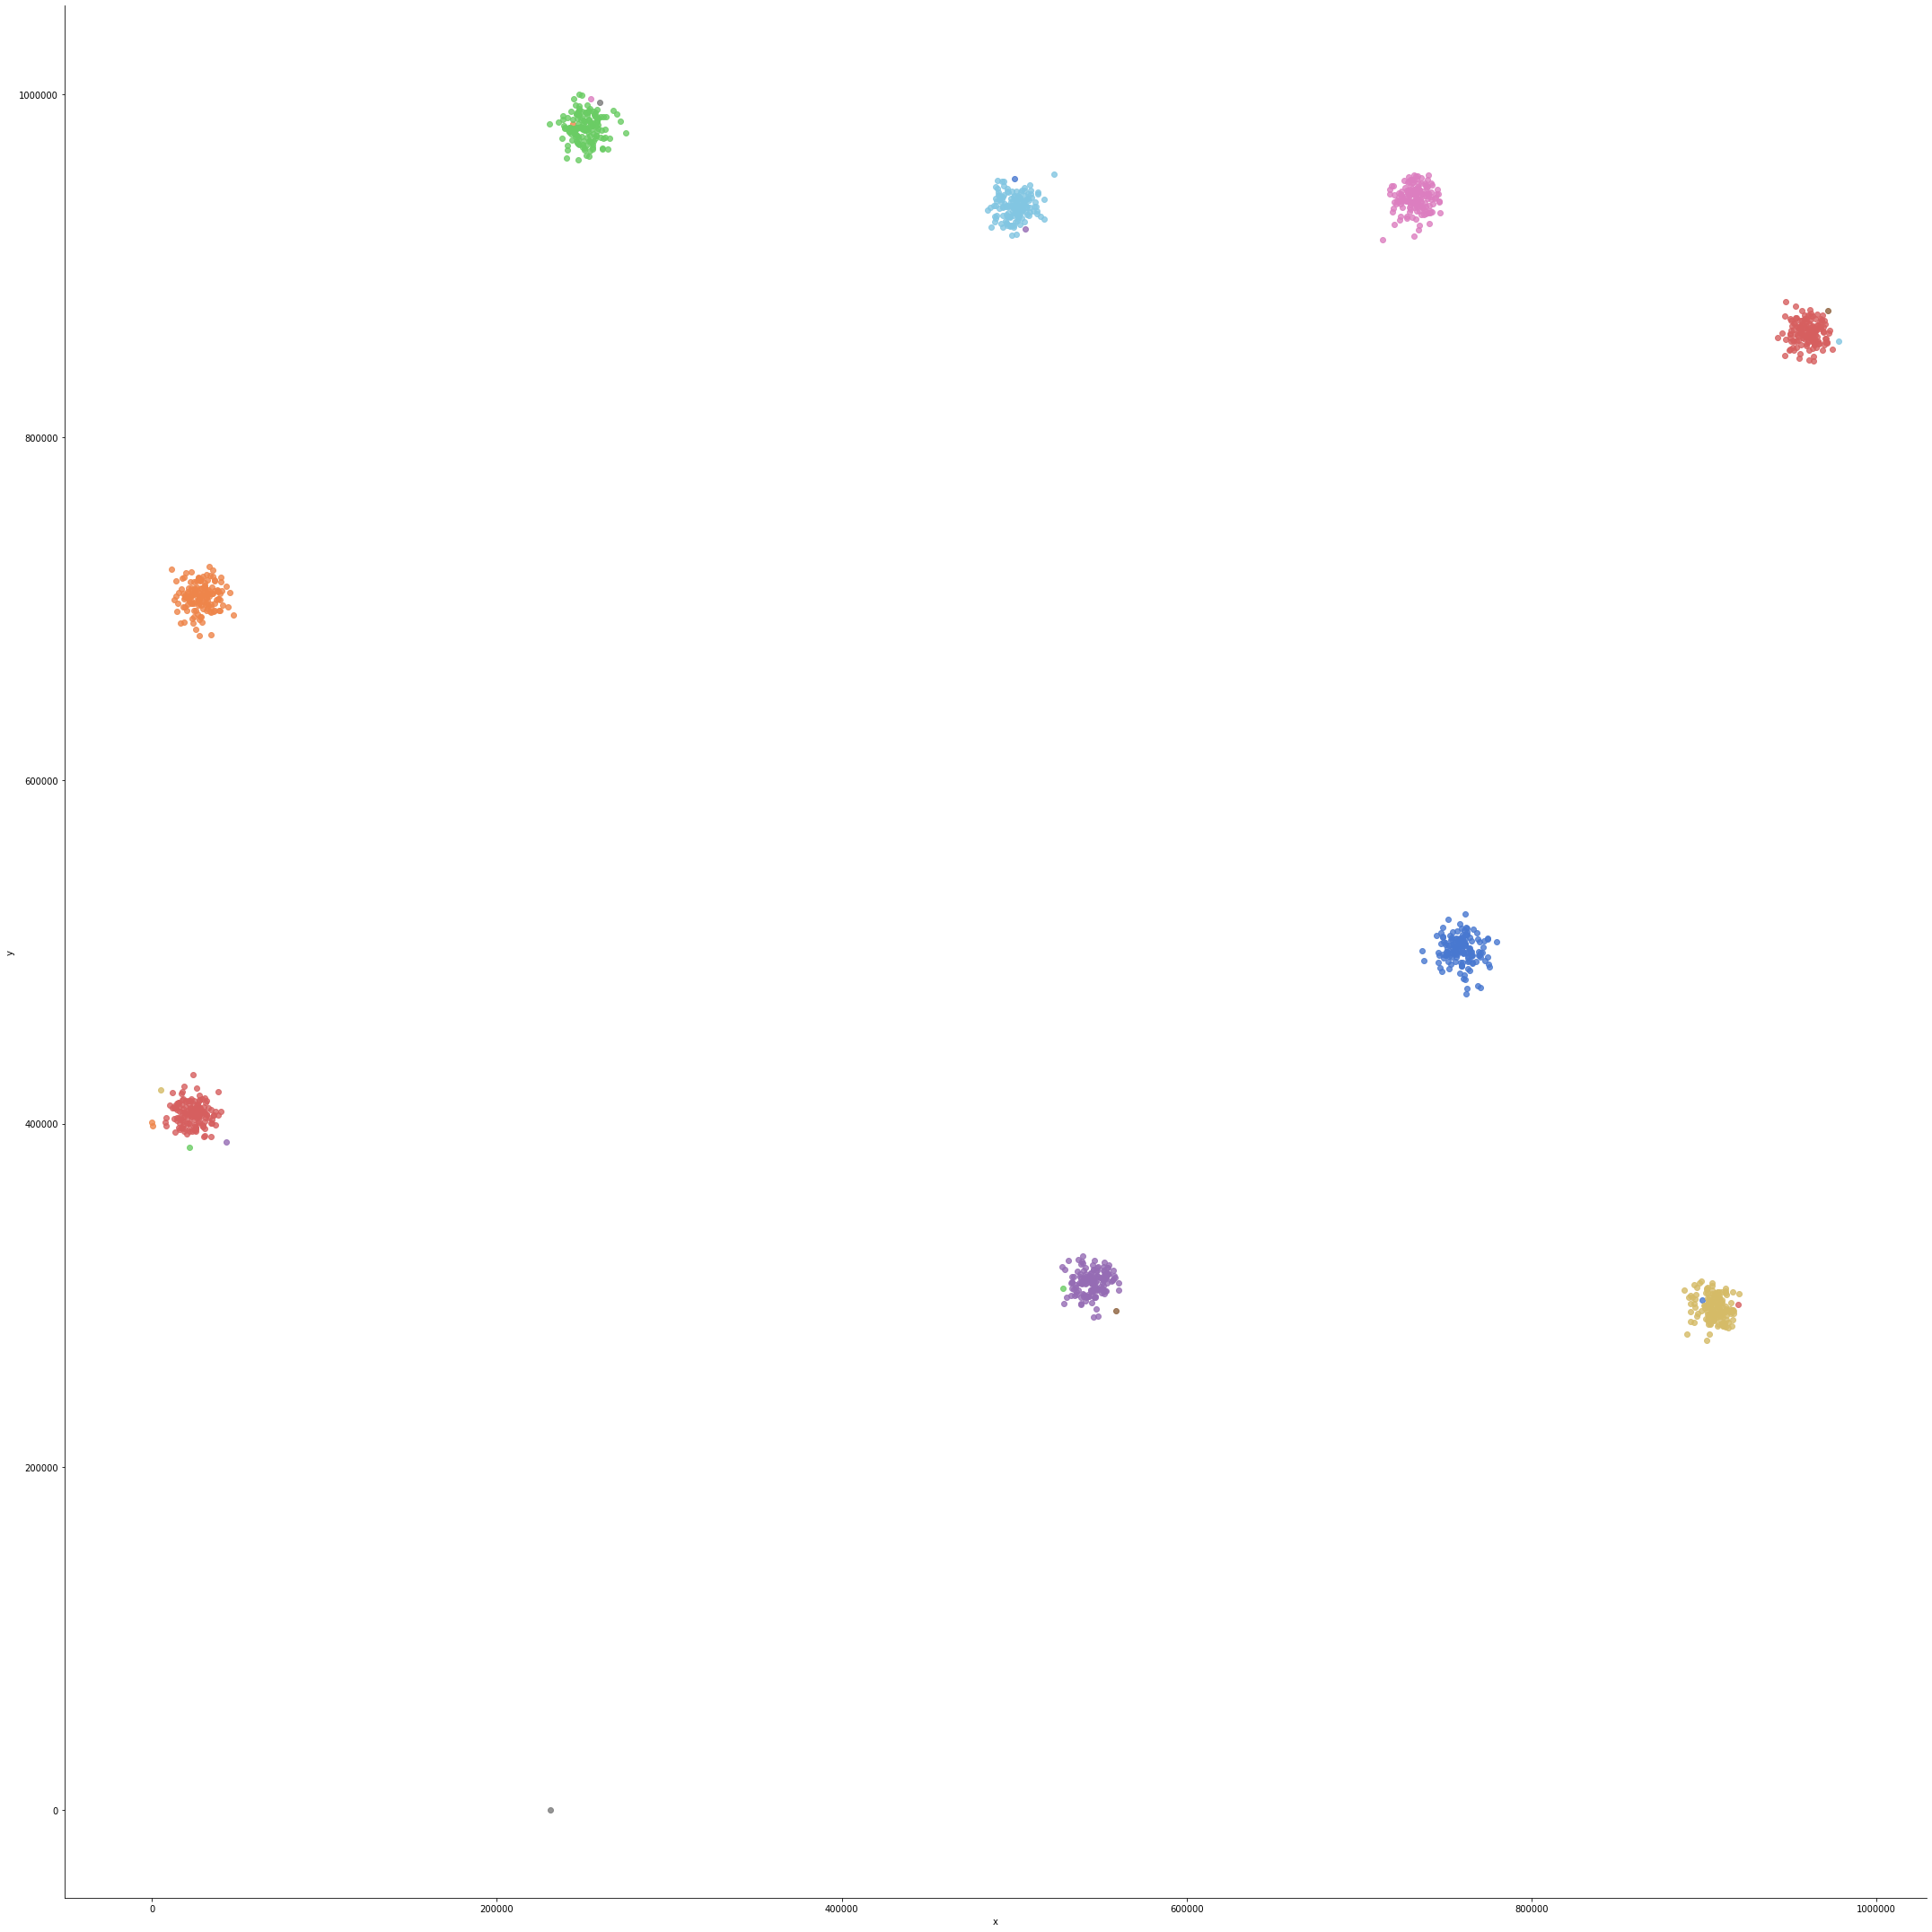

In [41]:
df10 = calcular_y_graficar('DIM-2','kruskal',5,0,3,'ft')
sns.lmplot(data=df10 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=30,palette=sns.color_palette("muted"))

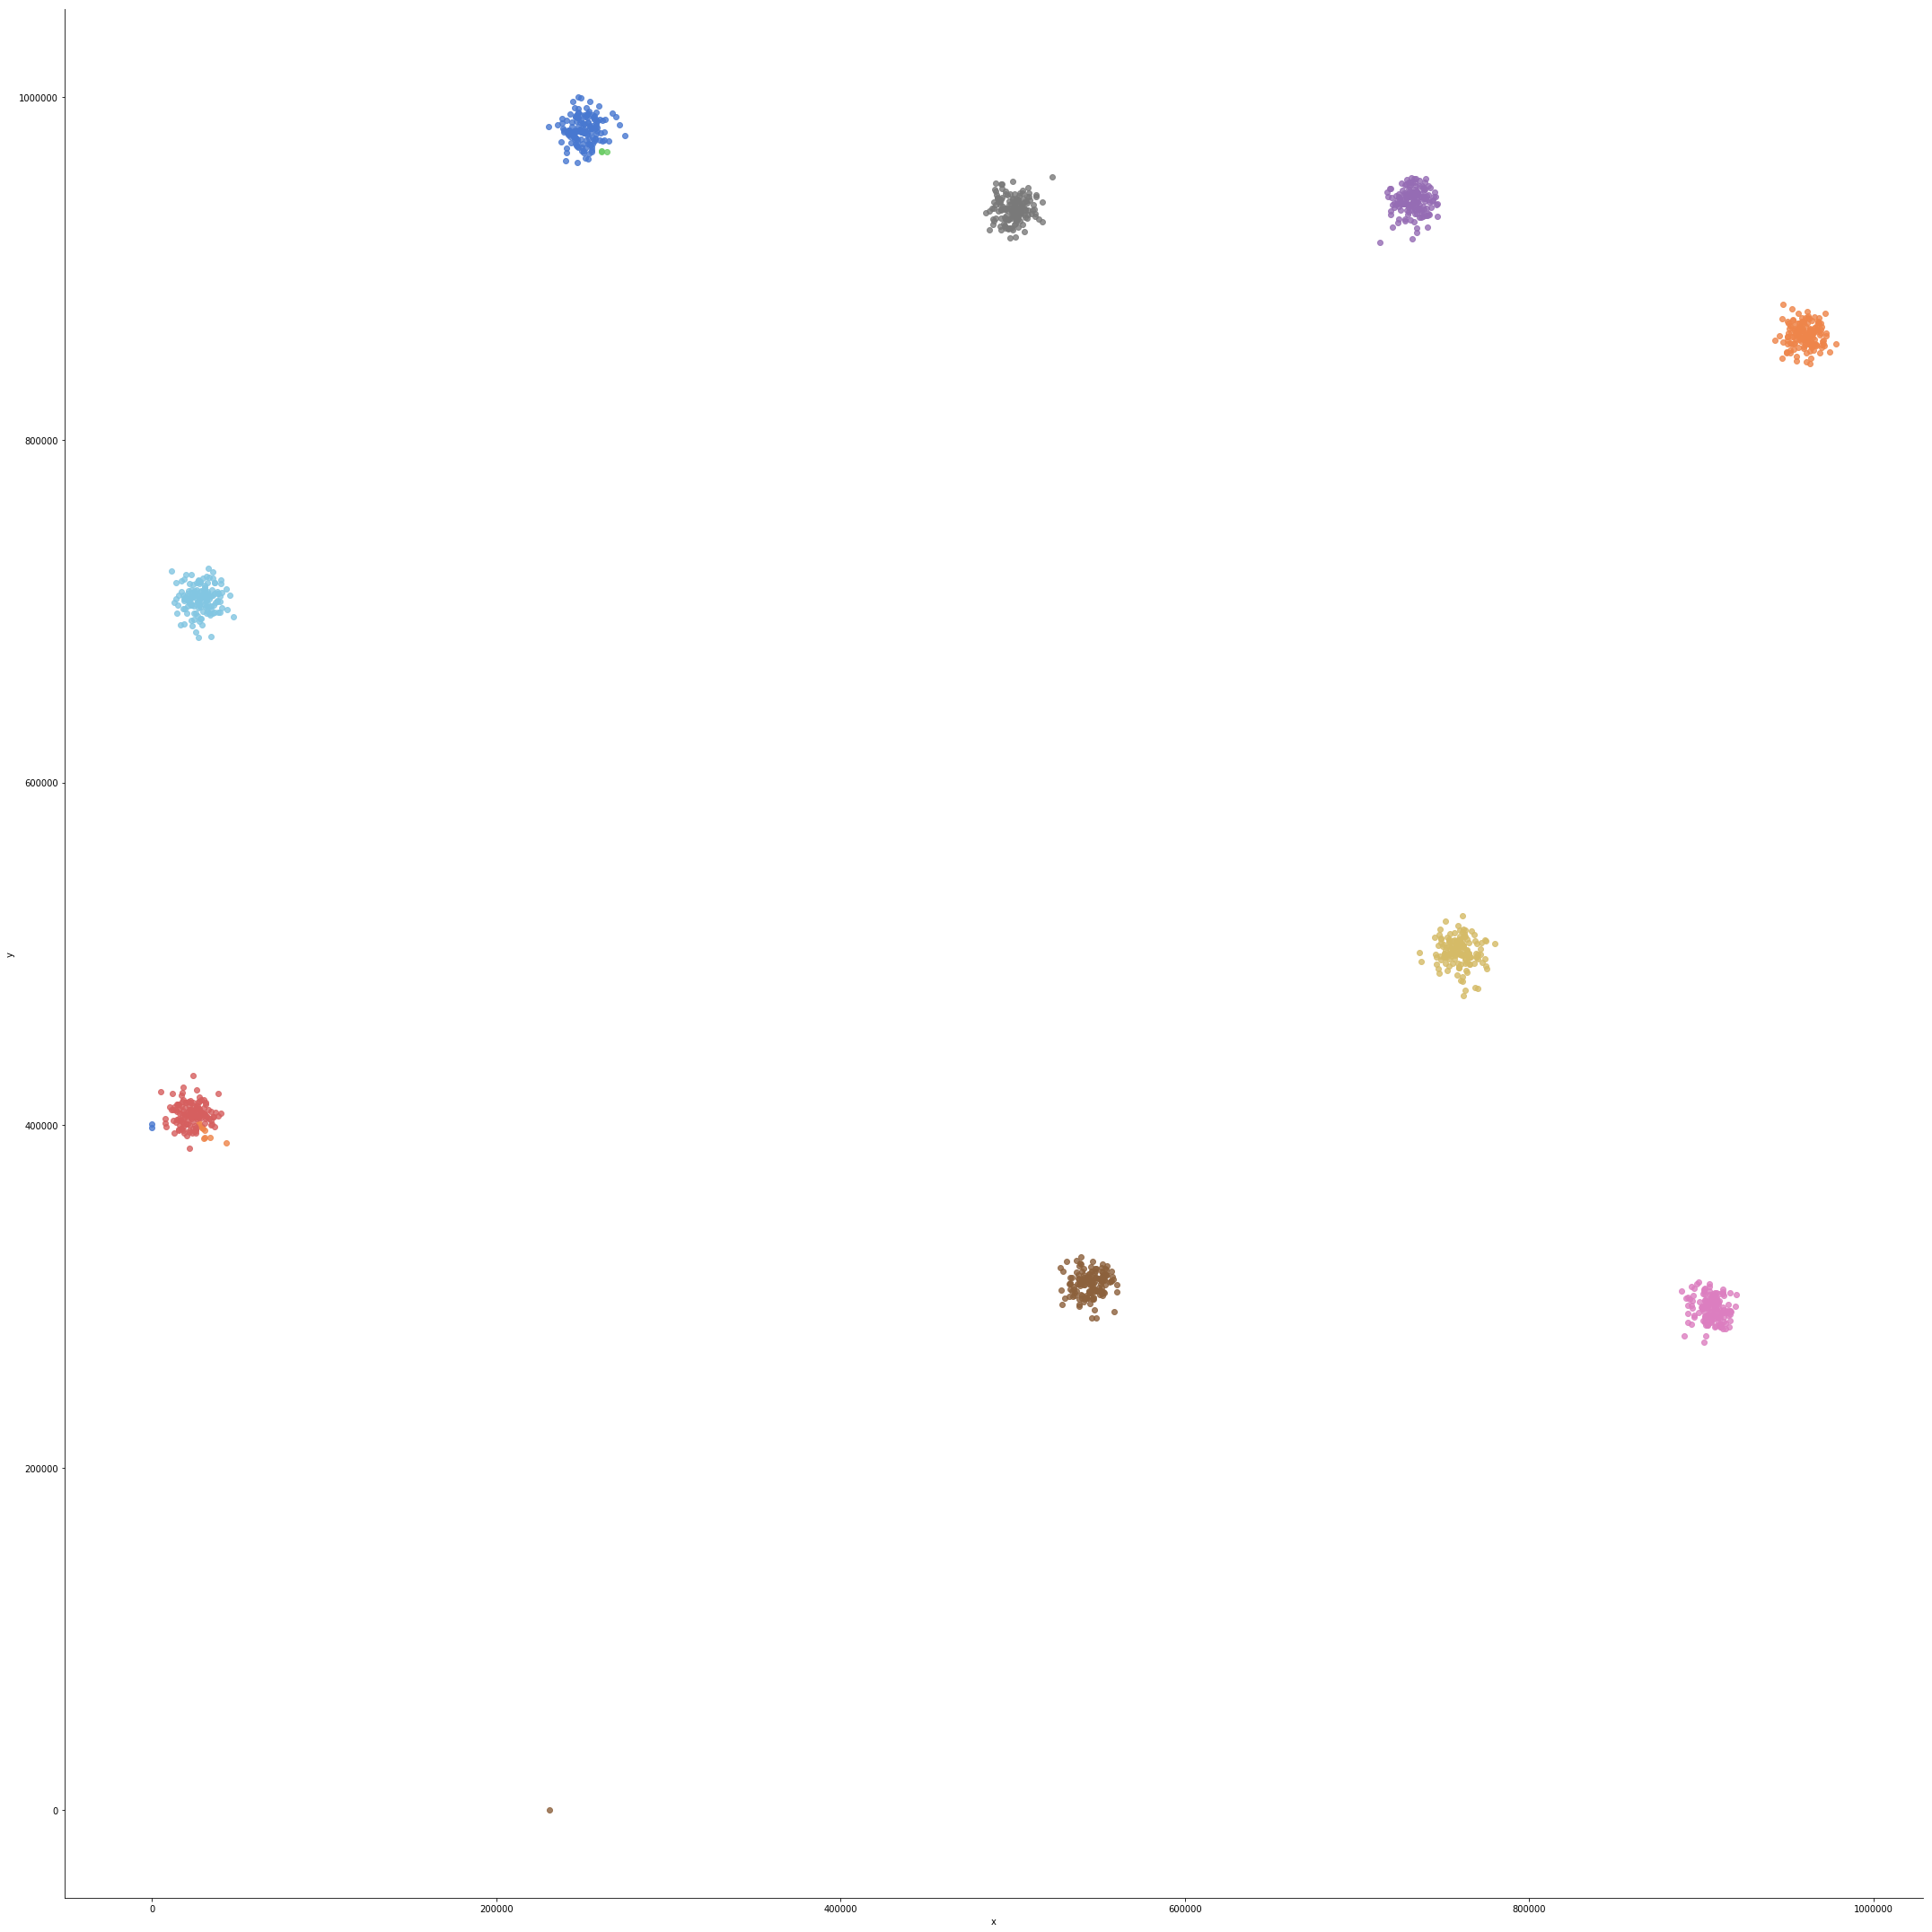

In [24]:
df10 = calcular_y_graficar('DIM-2','kruskal',5,0,2.5,'ft')
sns.lmplot(data=df10 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=30,palette=sns.color_palette("muted"))

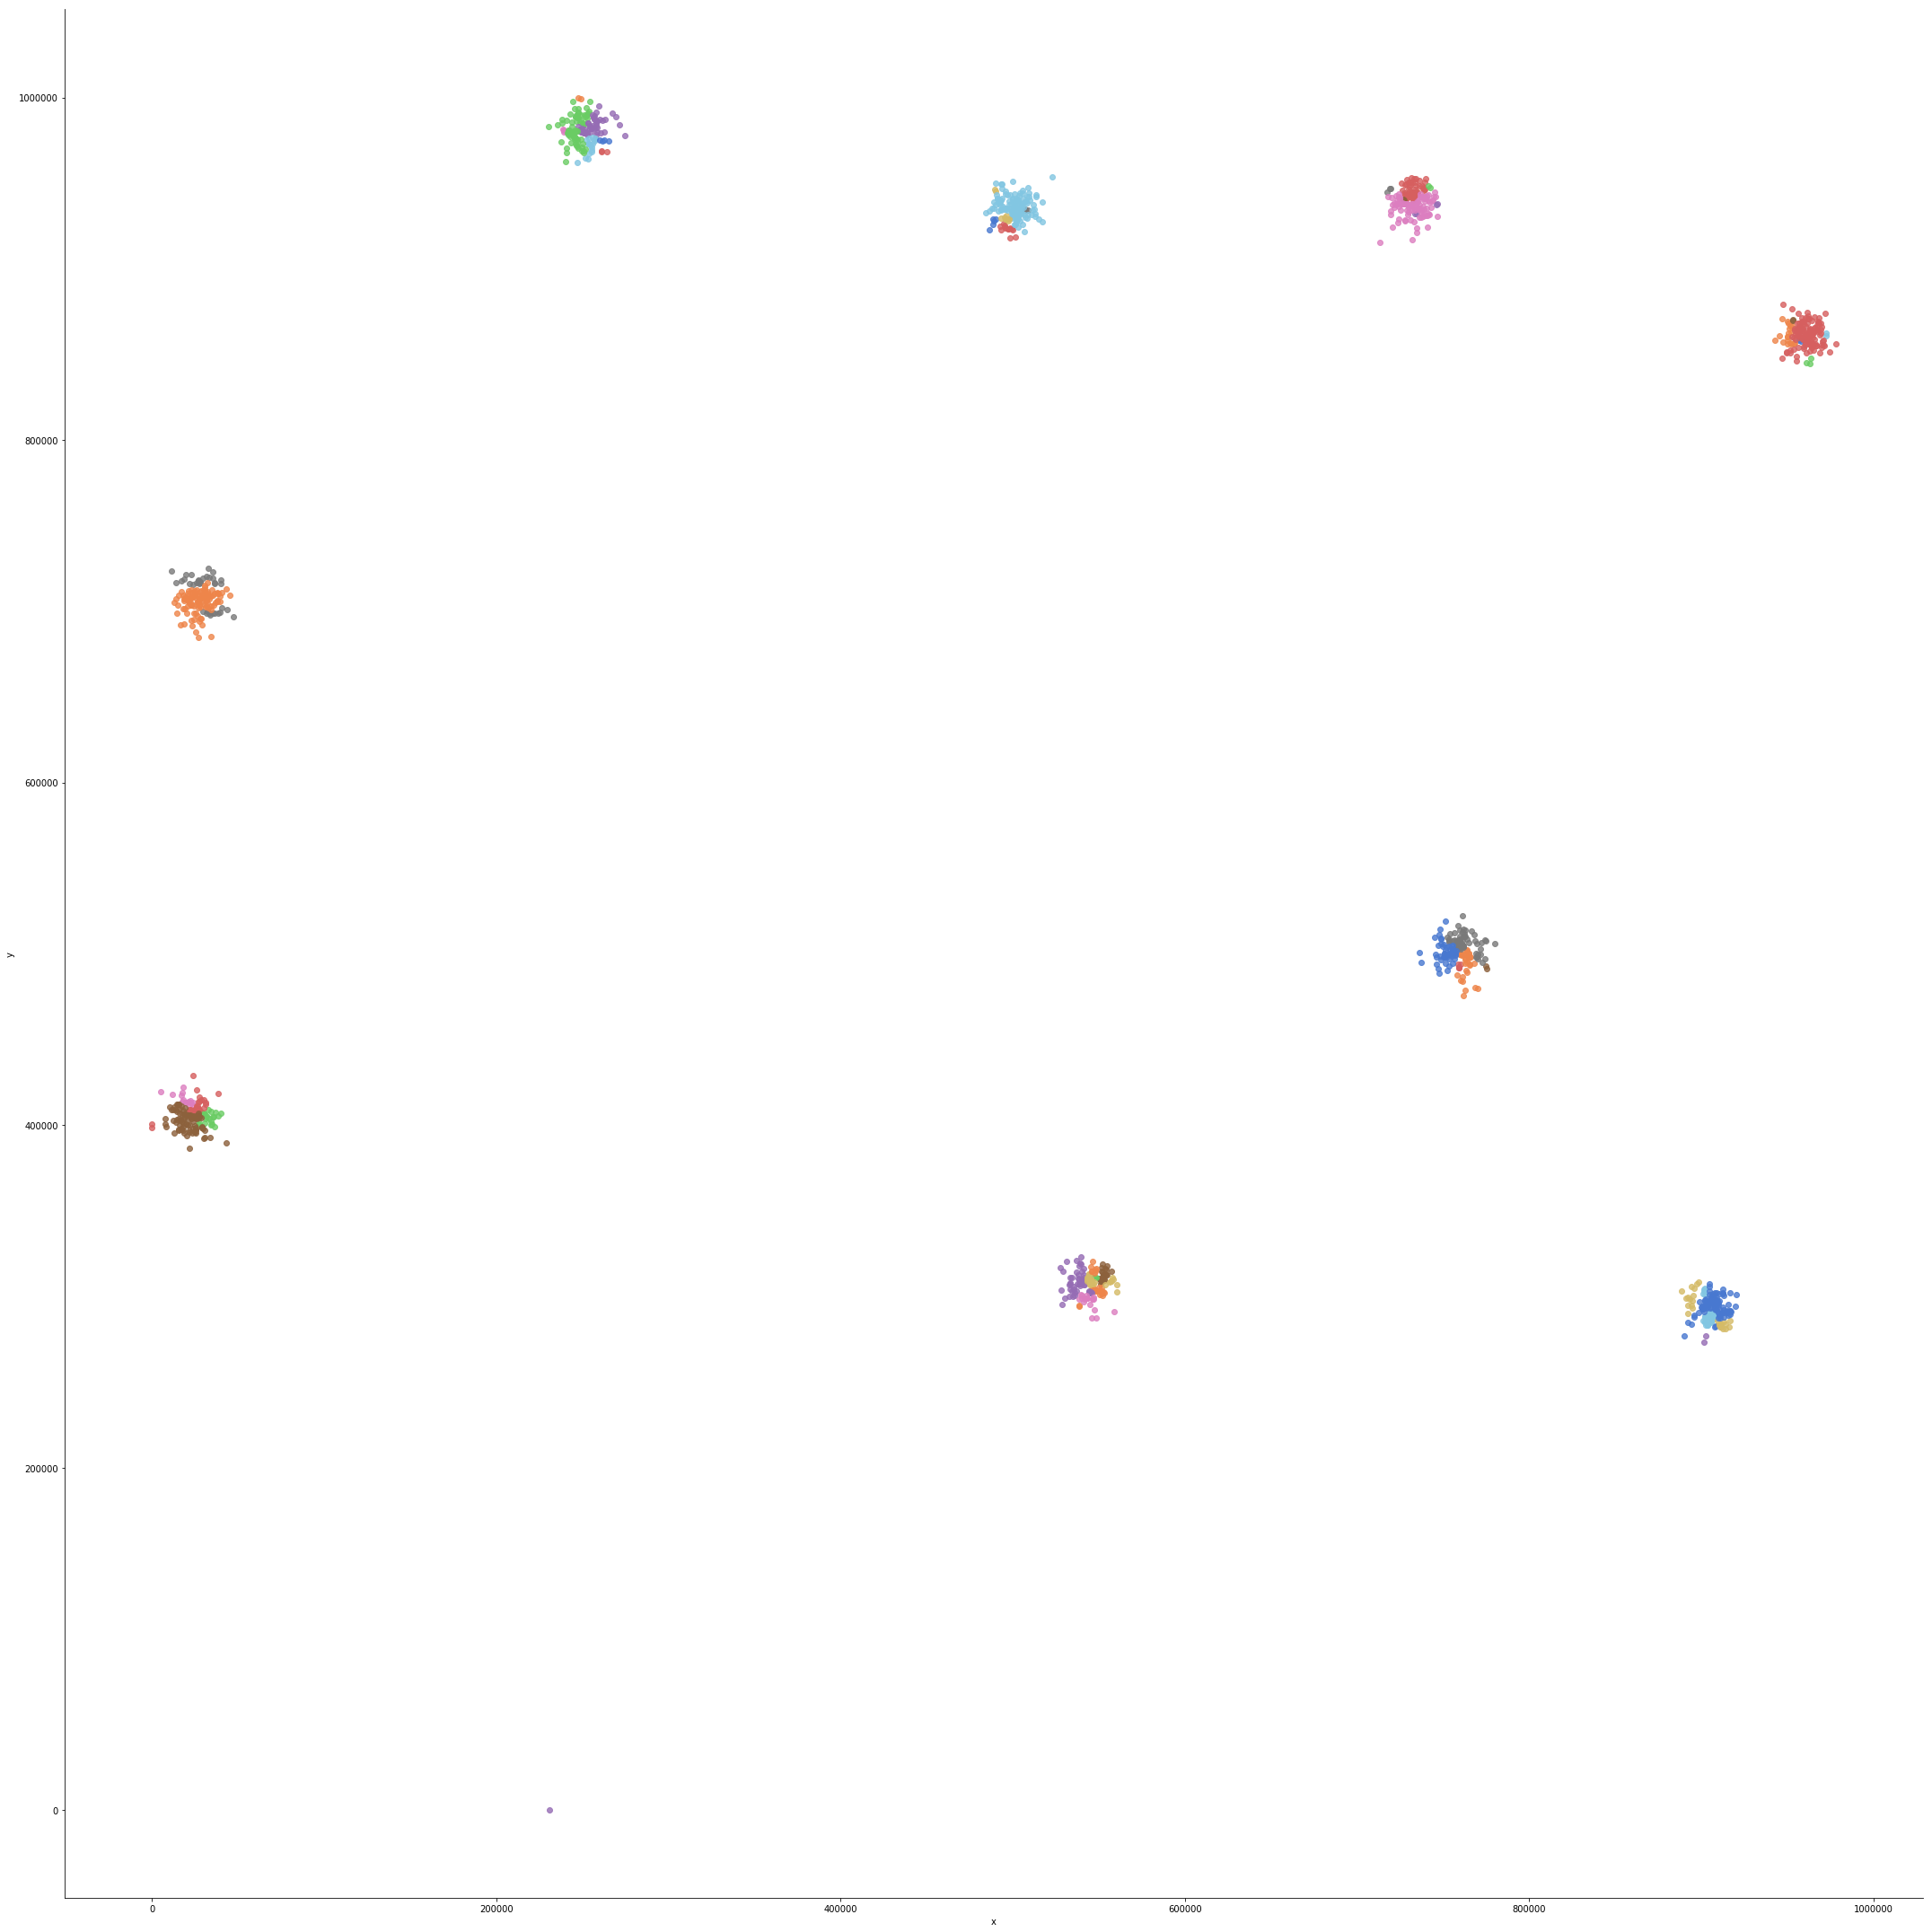

In [25]:
df10 = calcular_y_graficar('DIM-2','kruskal',5,0,1.5,'ft')
sns.lmplot(data=df10 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=30,palette=sns.color_palette("muted"))

Pudimos observar que al ir reduciendo el falor de ft encontramos que obtenemos muchos más clusters lo cual cumple lo que esperábamos.

## Vamos a usar a sigmaT

Con el parámetro sigmaT buscamos eliminar a ejes que están a "sigmaT" desviaciones standard del peso del eje que estamos analizando: W > media + varianza * sigmaT.
Con sigmaT = 3 estamos cortando el percentil 99 de los outliers.

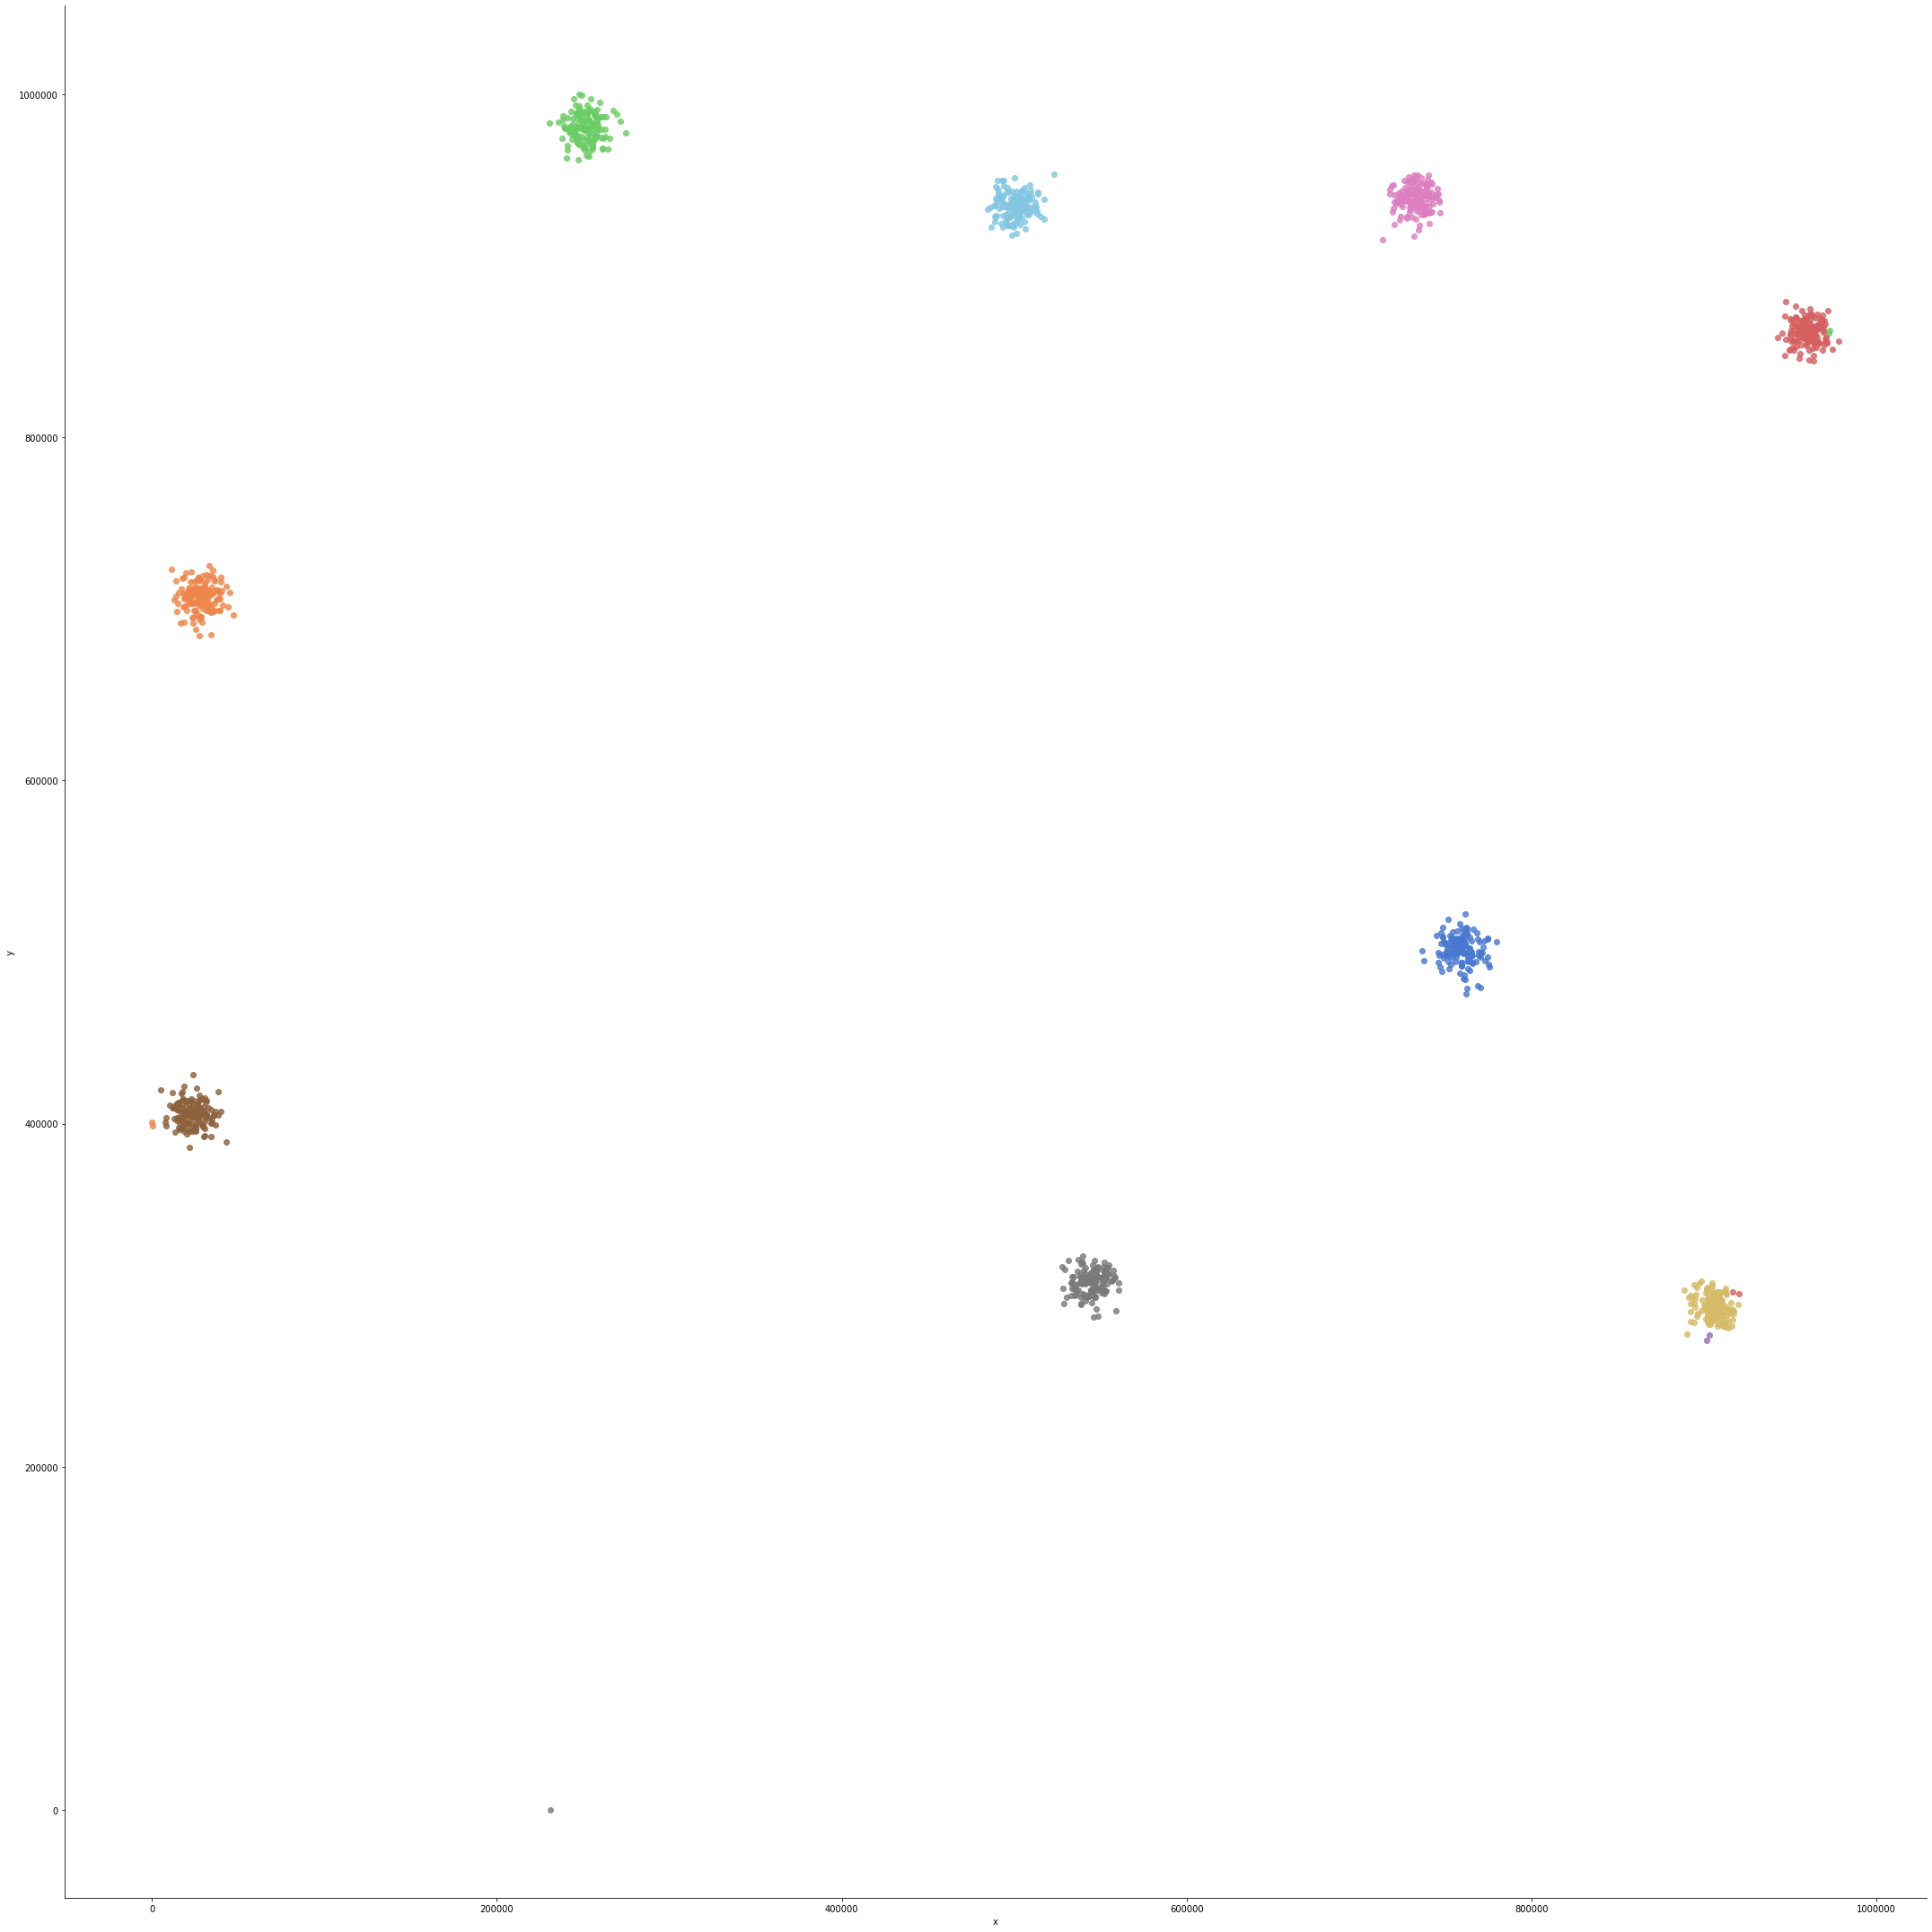

In [46]:
df10 = calcular_y_graficar('DIM-2','kruskal-compressed',10,4,0, 'sigmat')
sns.lmplot(data=df10 ,x='x',y='y',hue='clusters',fit_reg=False, legend=False, legend_out=False, height=30,palette=sns.color_palette("muted"))